## Regression models with `statmodels`

The work in this notebook assumes a good familiarity with linear regression models. The focus here will be primarily on using `statmodels` to do the analyses associated with linear regression. Additional details of any of the associated concepts can be found in the `references` section of the repo. The work in this section was done in `R`, but `statmodels` uses similar syntax.

The beauty of linear regression models are their **interpretability**. This also makes them an ideal first model to build in an analysis because they provide a good baseline for comparison with successive model builds.

### Python packages for regression

#### statsmodels
+ Optimized for insight (focus in this course)
+ Formulas are specified with the same syntax as used in `R`

#### scikit-learn
+ Optimized for prediction

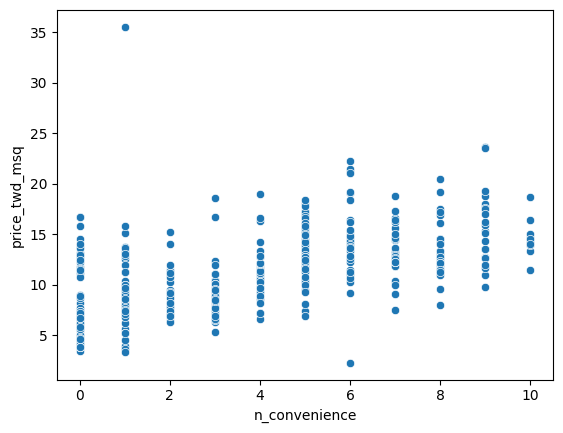

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

taiwan_real_estate = pd.read_csv("./data/taiwan_real_estate2.csv")

# Draw the scatter plot
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate)

# Show the plot
plt.show()

<Axes: xlabel='n_convenience', ylabel='price_twd_msq'>

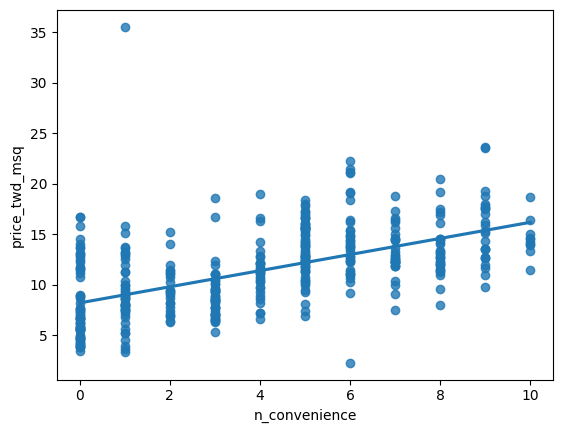

In [2]:
# with regression line
sns.regplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, ci=None)

## Linear regression with `ols()`



In [3]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


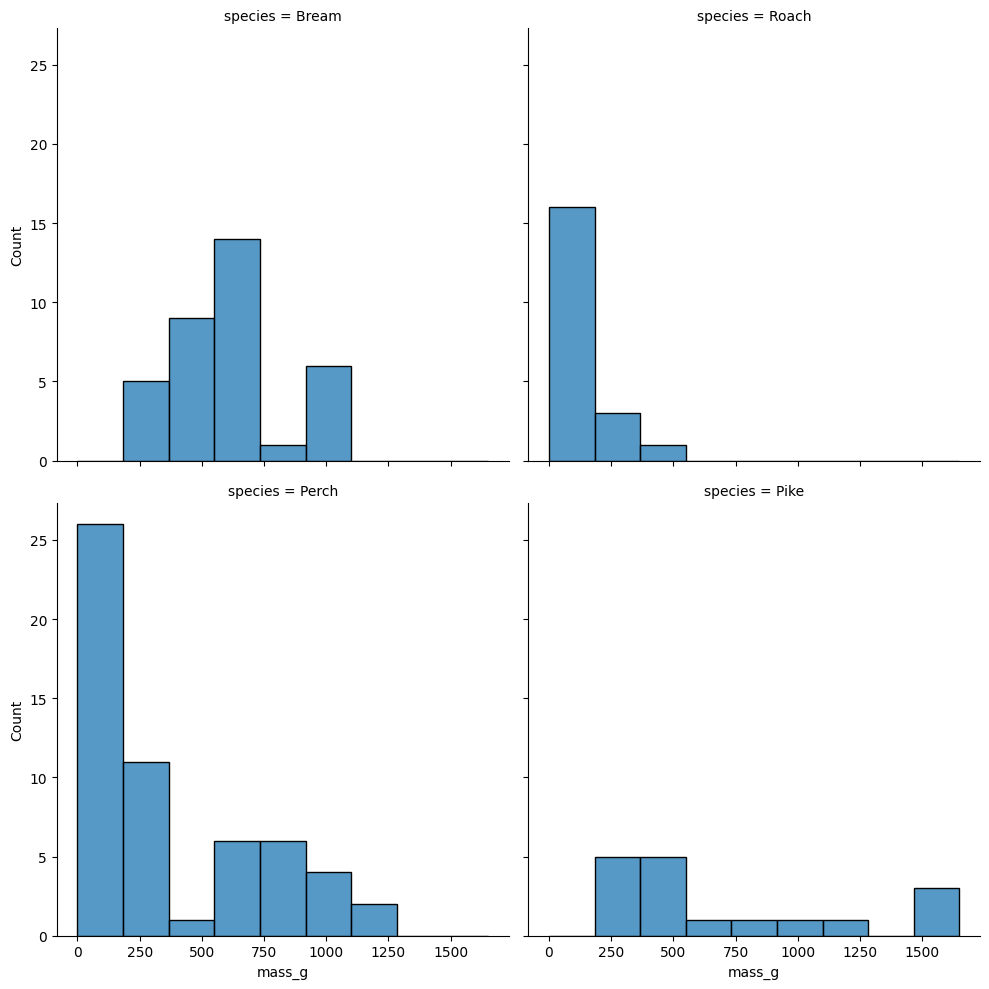

In [4]:
df_fish = pd.read_csv('./data/fish.csv')

sns.displot(data=df_fish, 
            x="mass_g", 
            col="species", 
            col_wrap=2, 
            bins=9) 
plt.show()

In [5]:
summary_stats = df_fish.groupby("species")["mass_g"].mean()
print(summary_stats)

species
Bream    617.828571
Perch    382.239286
Pike     718.705882
Roach    152.050000
Name: mass_g, dtype: float64


In [6]:
mdl_mass_vs_species = ols("mass_g ~ species", data=df_fish).fit()
print(mdl_mass_vs_species.params)  # notice the intercept is mean of Bream

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


Since these are categorical variables, inputs are 1 for the particular species of interest and 0 for the others. The above output sets the **Beam** level as the baseline, so means of the other 3 species can be computed from this baseline:

\begin{align*}
  & \text{response} = \text{fish weight in grams} = y = \beta_0 + \beta_1x_1 + \beta_2x_2+ \beta_3x_3 \\
  & y = 617.8286 - (235.5892)(\text{Perch}) + (100.8773)(\text{Pike}) - (465.7786)(\text{Roach}) \\
  & y_{Perch} = 617.8286 - 235.5892 = 382.2394 \\
  & y_{Pike} = 617.8286 + 100.8773 = 718.7059 \\
  & y_{Roach} = 617.8286 - 465.7786 = 152.05
\end{align*}

The above representation is useful for multiple linear regression, but simple linear regression, we may want everything relative to 0. To do this, we just need to rewrite the equation so that there is not intercept:

In [7]:
mdl_mass_vs_species = ols("mass_g ~ species + 0", data=df_fish).fit()
print(mdl_mass_vs_species.params) 

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64


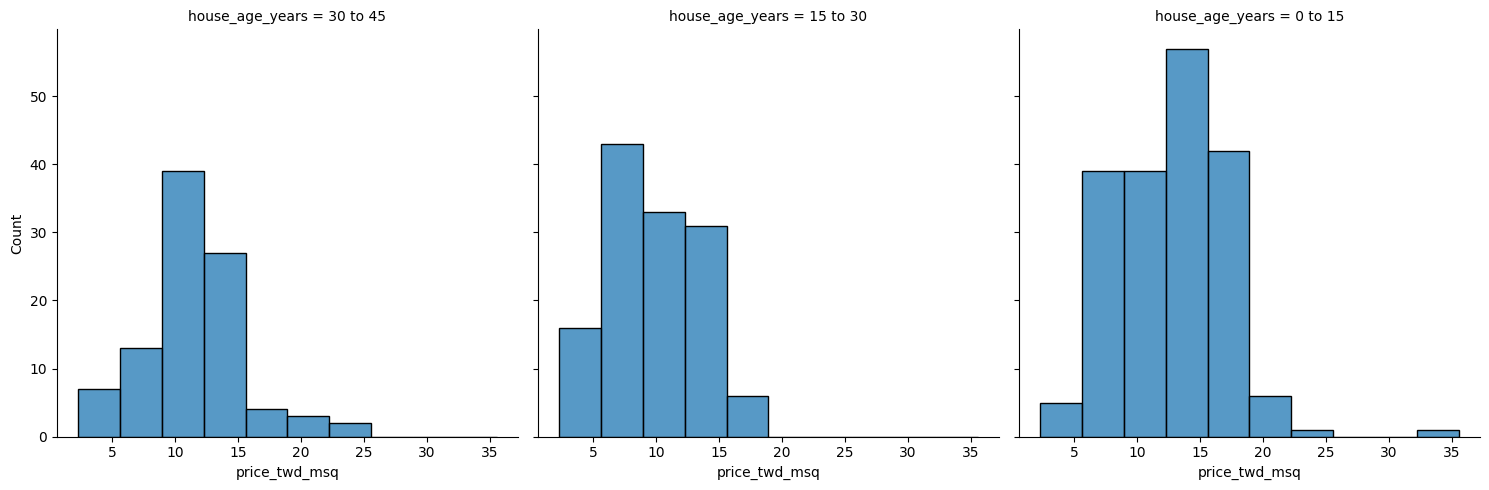

In [8]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x="price_twd_msq",
         col="house_age_years",
         bins=10)

# Show the plot
plt.show()

In [9]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [10]:
# Create the model, fit it
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [11]:
# Update the model formula to remove the intercept
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## Back to the fish data...

Say we want to predict mass of a bream given it's length. First, filter out the bream samples and then plot mass vs. length. After that, we'll fit a model to use for predictions.

In [12]:
df_fish.columns

Index(['species', 'mass_g', 'length_cm'], dtype='object')

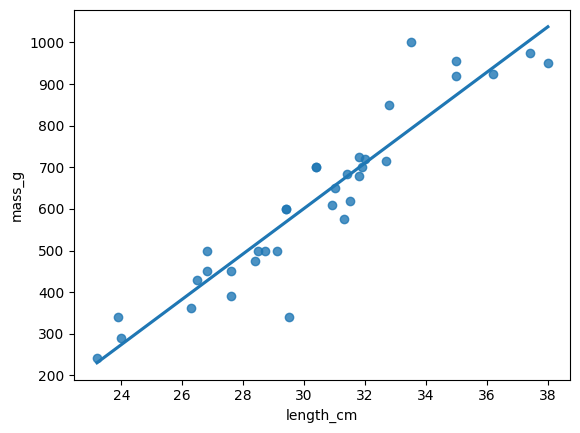

In [13]:
bream = df_fish.loc[df_fish['species'] == "Bream"]
sns.regplot(x="length_cm",
            y="mass_g",
           data=bream,
           ci=None)

plt.show()

In [14]:
mdl_mass_vs_length = ols("mass_g ~ length_cm", data=bream).fit()
print(mdl_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [15]:
import numpy as np
# create some lengths which we'll use to predict weights
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})  # 20 through 40
# need to pass a dataframe to predict - the df must contain the predictors (independent variables)
explanatory_data["predicted_mass_g"] = mdl_mass_vs_length.predict(explanatory_data)
explanatory_data.head()

,length_cm,predicted_mass_g
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977


In [16]:
# the course does this another way
explanatory_data = pd.DataFrame({"length_cm": np.arange(20, 41)})  # reset
prediction_data = explanatory_data.assign( 
    mass_g=mdl_mass_vs_length.predict(explanatory_data) 
)

prediction_data.head()

,length_cm,mass_g
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977


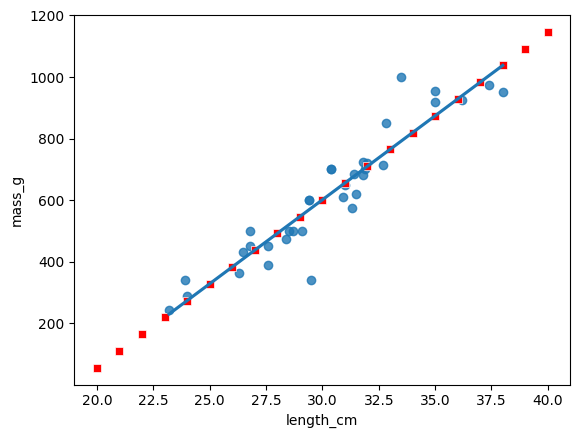

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 
fig = plt.figure()  # so we can overlay plots
sns.regplot(x="length_cm",
            y="mass_g", 
            ci=None, 
            data=bream)

sns.scatterplot(x="length_cm", 
                y="mass_g", 
                data=prediction_data,  
                color="red", 
                marker="s") 
plt.show() 

In [18]:
# Create the model with number of convenience stares
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit()

mdl_price_vs_conv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 12 May 2025   Prob (F-statistic):           3.41e-37
Time:                        14:32:28   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857      0.000       7.664       8.784
n_convenience     0.7981      0.057     14.118      0.000       0.687       0.909
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## S&P 500 annual returns

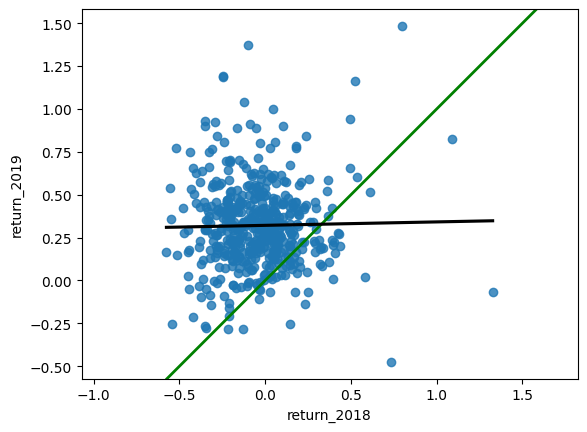

In [19]:
sp500_yearly_returns = pd.read_csv("./data/sp500_yearly_returns.csv")

fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x="return_2018",
            y="return_2019",
            data=sp500_yearly_returns,
            ci=None,
            line_kws={"color": "black"})

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

In [20]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data = sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [21]:
# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


## Transforming the explanatory variable

If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, we'll look at transforming the explanatory variable.

Taking another look at the Taiwan real estate dataset, this time we'll use the distance to the nearest MRT (metro) station as the explanatory variable.

In [22]:
taiwan_real_estate.columns

Index(['dist_to_mrt_m', 'n_convenience', 'house_age_years', 'price_twd_msq'], dtype='object')

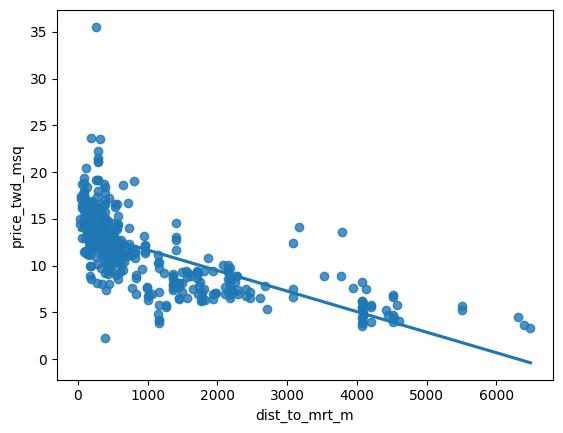

In [23]:
plt.figure()

sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None )


plt.show()

In [24]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
mdl_price_vs_dist.params

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64

In [25]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)

# Print the result
print(prediction_data)

# add a layer to the plot

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


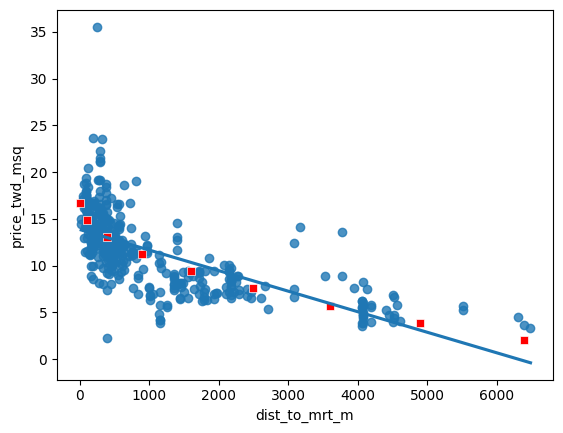

In [26]:
# un-tranformed prediction
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer for tranformed prediction points in red
sns.scatterplot(data=prediction_data, x="dist_to_mrt_m", y="price_twd_msq", color="red", marker="s")
plt.show()

## Transforming the response variable

The response variable can be transformed too, but this means we need an extra step at the end to undo that transformation - aka "back transform" the predictions.

A first step in a digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

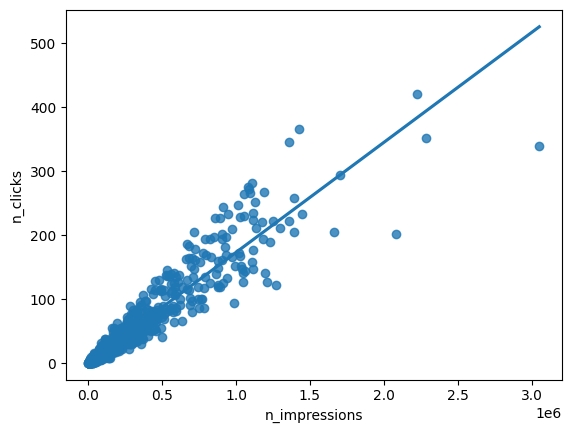

In [27]:
ad_conversion = pd.read_csv("./data/ad_conversion.csv")

sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion, ci=None)
plt.show()

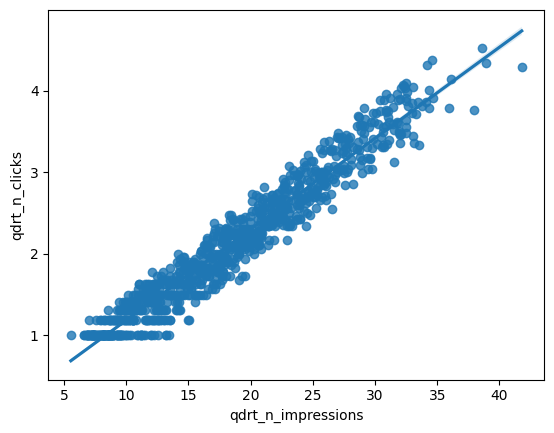

In [28]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = np.power(ad_conversion["n_impressions"], 0.25)
ad_conversion["qdrt_n_clicks"] = np.power(ad_conversion["n_clicks"], 0.25)

plt.figure()

# Plot using the transformed variables
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion)
plt.show()

In [29]:
# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


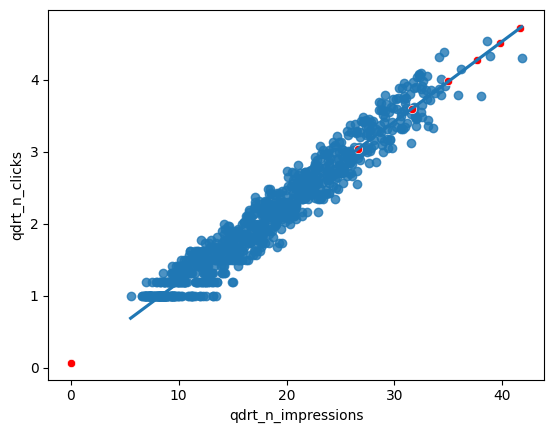

In [30]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data= prediction_data, color="red")
plt.show()